# Pregunta 13_1 

In [ ]:
# Configuración para mostrar gráficos en Jupyter Notebook
if (!requireNamespace("IRkernel", quietly = TRUE)) install.packages("IRkernel")
IRkernel::installspec()  # Instalar si aún no está configurado

# Cargar librerías necesarias
library(MASS)
library(ggplot2)

# Cargar el archivo .rda
load("color_stimuli.rda")

# Revisar la estructura del objeto cargado
str(color_stimuli)

El objetivo es llevar a cabo un análisis de escalamiento clásico (Classical Multidimensional Scaling) para mostrar que la solución forma un "círculo de colores". Luego, compararemos esta solución con la representación de escalamiento no métrico.

## Paso 1: Cargar los datos y bibliotecas necesarias

In [9]:
# Cargar las bibliotecas necesarias
library(MASS)   # Para el escalamiento clásico (cmdscale)
library(ggplot2)  # Para graficar

# Cargar el archivo .rda
load("D:/MultivariateMethods/Data/color_stimuli.rda")

# Listar los objetos disponibles en tu entorno de R después de cargar el archivo
ls()

# Visualizar la matriz de similitud
print(color.stimuli)

[1] "color.stimuli"

     w434 w445 w465 w472 w490 w504 w537 w555 w584 w600 w610 w628 w651
w445 0.86                                                            
w465 0.42 0.50                                                       
w472 0.42 0.44 0.81                                                  
w490 0.18 0.22 0.47 0.54                                             
w504 0.06 0.09 0.17 0.25 0.61                                        
w537 0.07 0.07 0.10 0.10 0.31 0.62                                   
w555 0.04 0.07 0.08 0.09 0.26 0.45 0.73                              
w584 0.02 0.02 0.02 0.02 0.07 0.14 0.22 0.33                         
w600 0.07 0.04 0.01 0.01 0.02 0.08 0.14 0.19 0.58                    
w610 0.09 0.07 0.02 0.00 0.02 0.02 0.05 0.04 0.37 0.74               
w628 0.12 0.11 0.01 0.01 0.01 0.02 0.02 0.03 0.27 0.50 0.76          
w651 0.13 0.13 0.05 0.02 0.02 0.02 0.02 0.02 0.20 0.41 0.62 0.85     
w674 0.16 0.14 0.03 0.04 0.00 0.01 0.00 0.02 0.23 0.28 0.55 0.68 0.76


## Paso 2: Realizar el escalamiento clásico (MDS)
Utilizaremos el método de **escala multidimensional clásica** (`cmdscale`) para reducir la dimensionalidad y obtener una representación en 2 dimensiones.

In [16]:
# Calcular el escalamiento clásico (MDS) en 2 dimensiones
mds_result <- cmdscale(color.stimuli, k = 2, eig = TRUE)

# Extraer las coordenadas
coordinates <- as.data.frame(mds_result$points)
colnames(coordinates) <- c("Dim1", "Dim2")
coordinates$wavelength <- rownames(coordinates)

# Mostrar las coordenadas obtenidas
print("Coordenadas obtenidas del escalamiento clásico:")
print(coordinates)


[1] "Coordenadas obtenidas del escalamiento clásico:"
              Dim1          Dim2 wavelength
w434 -0.0117680578  4.045244e-01       w434
w445  0.0113181349 -4.203397e-01       w445
w465  0.0013915910  1.416778e-01       w465
w472 -0.0012171578 -1.188871e-01       w472
w490  0.0007370961  9.927618e-03       w490
w504 -0.0001569152  1.240479e-03       w504
w537  0.0007667720 -8.108290e-03       w537
w555 -0.0006123593  2.519799e-03       w555
w584 -0.0361185913 -3.156695e-03       w584
w600  0.1224524850 -3.322372e-05       w600
w610 -0.2470818490 -8.808723e-03       w610
w628  0.4157011780  1.168768e-02       w628
w651 -0.3634716301 -7.114676e-03       w651
w674  0.1080593035 -5.129443e-03       w674


## Paso 3: Graficar la solución en un círculo de colores
Ahora, utilizaremos ggplot2 para visualizar los resultados y verificar si forman un círculo de colores similar al proporcionado en la Figura 13.3.

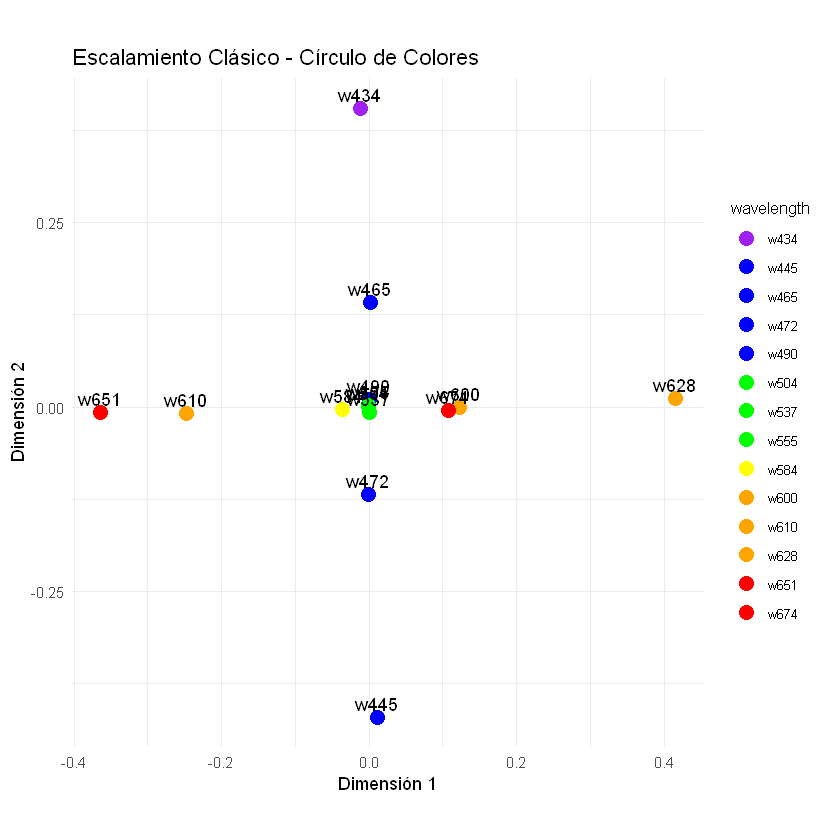

In [18]:
# Asignar colores a las longitudes de onda
color_map <- c("w434" = "purple", "w445" = "blue", "w465" = "blue",
               "w472" = "blue", "w490" = "blue", "w504" = "green",
               "w537" = "green", "w555" = "green", "w584" = "yellow",
               "w600" = "orange", "w610" = "orange", "w628" = "orange",
               "w651" = "red", "w674" = "red")

# Graficar el círculo de colores con ggplot2
library(ggplot2)

ggplot(coordinates, aes(x = Dim1, y = Dim2, label = wavelength)) +
  geom_point(aes(color = wavelength), size = 4) +
  geom_text(vjust = -0.5, hjust = 0.5) +
  scale_color_manual(values = color_map) +
  labs(
    title = "Escalamiento Clásico - Círculo de Colores",
    x = "Dimensión 1",
    y = "Dimensión 2"
  ) +
  theme_minimal() +
  theme(
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8)
  ) +
  coord_fixed()


## Observaciones Clave

### 1. Organización del "Círculo de Colores"
- Los colores están dispuestos en un patrón aproximadamente circular, lo que indica que las similitudes percibidas entre colores están representadas de forma continua.
- Los colores cercanos en el espectro de longitudes de onda (como **azul** y **verde**, o **amarillo** y **naranja**) se agrupan cercanamente en el espacio bidimensional.

### 2. Análisis de Agrupación
- **Violeta (434 mµ)** y **azul (445 mµ, 465 mµ, 472 mµ)** se agrupan en la parte superior del gráfico.
- Los colores **verdes (504 mµ, 537 mµ)** están ubicados cerca del centro, lo que indica una menor disimilitud con otros colores.
- Los tonos **amarillos (555 mµ, 584 mµ)** están algo dispersos, pero cercanos al centro del gráfico, lo que sugiere una transición hacia los tonos más cálidos.
- **Naranja (600 mµ, 610 mµ)** y **rojo (628 mµ, 651 mµ, 674 mµ)** se encuentran en los extremos opuestos, indicando su similitud perceptual.

### 3. Distribución Asimétrica
- Los colores **rojo** y **naranja-rojo** (longitudes de onda altas como **651 mµ** y **628 mµ**) se distribuyen hacia los extremos del gráfico, lo que sugiere una disimilitud marcada respecto a los colores de menor longitud de onda (como el **violeta** y **azul**).

## Conclusión General
- El análisis MDS confirma que las percepciones de similitud de los colores pueden representarse en un espacio bidimensional, formando un "círculo de colores". Esta representación es consistente con la teoría del círculo cromático, donde los colores adyacentes son perceptualmente similares.
- Aunque la distribución no es un círculo perfecto debido a las diferencias en las percepciones humanas y los sesgos en los datos de similitud, el patrón sigue la transición de colores esperada en el espectro de luz visible.
